In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install seaborn --upgrade seaborn
!pip install matplotlib --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 8.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 7.2 MB/s 
     |████████████████████████████████| 295 kB 52.2 MB/s 
     |████████████████████████████████| 965 kB 51.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
!pip install text2emotion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 3.4 MB/s 
     |████████████████████████████████| 240 kB 18.9 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=979ab0fd2111adffa28479941082da4c134f615c45aa49a853b7c05277af05ee
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
!pip install  emoji==1.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 9.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=db921255a005aa4d4aa05306b2791d85441b034f4938b401e03580a470ae329d
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import nltk
from nltk import ngrams
from nltk import word_tokenize
import wordcloud
import text2emotion as te
import seaborn as sns

# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import re, string
import nltk, spacy
import warnings
warnings.filterwarnings('ignore')

from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('words')
nltk.download('omw-1.4')





## Classifiers

# import the libraries
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
df=pd.read_csv("/content/drive/Shareddrives/UnipiSharedDrive/IndvsPak_tweets.csv")

In [ ]:
df[["id","text","hashtags","created_at","user followers count","replycount"]]

,id,text,hashtags,created_at,user followers count,replycount
0,1584689793698791424,Hangover of #INDvsPAK2022 is still around. #T2...,"['INDvsPAK2022', 'T20WorldCup']",2022-10-24 23:34:23+00:00,538,0
1,1584684371512291330,@TheBarmyArmy luv it \n\n❤️❤️❤️\n\n#INDvPAK \n...,"['INDvPAK', 'indvspakmatch', 'INDvsPAK2022']",2022-10-24 23:12:50+00:00,24,0
2,1584684147339296768,#INDvsPAK2022,['INDvsPAK2022'],2022-10-24 23:11:57+00:00,56,0
3,1584684139839905792,No ball thi #INDvsPAK2022,['INDvsPAK2022'],2022-10-24 23:11:55+00:00,56,0
4,1584681884210319360,@mufaddal_vohra @ImRo45 \n@BCCI \n\nWhen will\...,"['INDvPAK', 'INDvsPAK2022', 'T20Cricket']",2022-10-24 23:02:57+00:00,24,1
...,...,...,...,...,...,...
272265,1584171715977887744,@imVkohli Use this as a dislike button,NaN,2022-10-23 13:15:44+00:00,2281,0
272266,1584171715717783552,@HSajwanization @imVkohli .. and massive #Hear...,['HeartBreak'],2022-10-23 13:15:44+00:00,11,0
272267,1584171715583971330,@imVkohli Well played king your Father would b...,NaN,2022-10-23 13:15:44+00:00,55,0
272268,1584171714598285312,@imVkohli #GOAT #Kingkohli #Kingisalwaysaking,"['GOAT', 'Kingkohli', 'Kingisalwaysaking']",2022-10-23 13:15:43+00:00,47,0


In [ ]:
df.iloc[10:15]

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
10,1584658980982251520,Here are a few tips for link building:\n 1. Cr...,serpbeginner,"['seo', 'PakVsInd', 'INDvsPAK2022']",2022-10-24 21:31:57+00:00,8,0,0,1,0,en,NaN,NaN,NaN,Here are a few tips for link building:\n 1. Cr...
11,1584656953678012416,TYPES OF #CRICKET\nPLAY WELL OR PAY WELL\nRAND...,LJV08092001,"['CRICKET', 'Cheating', 'INDvsPAK2022']",2022-10-24 21:23:53+00:00,466,0,0,0,0,en,NaN,NaN,NaN,TYPES OF #CRICKET\nPLAY WELL OR PAY WELL\nRAND...
12,1584656552241217536,@ICC @cricketworldcup @BCCI Can you recheck @R...,AmitBarman07,['INDvsPAK2022'],2022-10-24 21:22:18+00:00,11,0,0,0,0,en,NaN,NaN,NaN,@ICC @cricketworldcup @BCCI Can you recheck @R...
13,1584655400171106304,#INDvsPAK2022\n#ViratKohli \nPuri mehfil hi lo...,Santosh13759826,"['INDvsPAK2022', 'ViratKohli']",2022-10-24 21:17:43+00:00,1,0,0,0,0,hi,NaN,NaN,NaN,#INDvsPAK2022\n#ViratKohli \nPuri mehfil hi lo...
14,1584653777713639424,@Brad_Hogg Where wer your pearls of wisdom whe...,Vkrajpu72226015,['INDvsPAK2022'],2022-10-24 21:11:16+00:00,8,0,0,0,0,en,NaN,1.584399e+18,https://twitter.com/Brad_Hogg,@Brad_Hogg Where wer your pearls of wisdom whe...


In [ ]:
df['language'].nunique()

54

In [ ]:
df["created_at"].min()

'2022-10-18 00:07:02+00:00'

In [ ]:
df["created_at"].max()

'2022-10-24 23:59:58+00:00'

In [ ]:
df["text"].nunique()

260884

In [ ]:
df["text"].duplicated().sum()

11386

In [ ]:
df["text"].isna().sum()

0

In [ ]:
df["username"].nunique()

143879

In [ ]:
df["text"][4]

'@mufaddal_vohra @ImRo45 \n@BCCI \n\nWhen will\n\n@klrahul \n\never learn ?? 🤯🤯\n\n#INDvPAK \n#INDvsPAK2022 \n#T20Cricket'

In [ ]:
df[df['text'].str.contains('RT @')==False]

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1584689793698791424,Hangover of #INDvsPAK2022 is still around. #T2...,drivesnflicks,"['INDvsPAK2022', 'T20WorldCup']",2022-10-24 23:34:23+00:00,538,0,0,6,0,en,NaN,NaN,NaN,Hangover of #INDvsPAK2022 is still around. #T2...
1,1584684371512291330,@TheBarmyArmy luv it \n\n❤️❤️❤️\n\n#INDvPAK \n...,Krishna59638949,"['INDvPAK', 'indvspakmatch', 'INDvsPAK2022']",2022-10-24 23:12:50+00:00,24,0,0,0,0,en,NaN,1.584539e+18,https://twitter.com/TheBarmyArmy,@TheBarmyArmy luv it \n\n❤️❤️❤️\n\n#INDvPAK \n...
2,1584684147339296768,#INDvsPAK2022,kingbabar__,['INDvsPAK2022'],2022-10-24 23:11:57+00:00,56,0,0,0,0,qht,NaN,NaN,NaN,#INDvsPAK2022
3,1584684139839905792,No ball thi #INDvsPAK2022,kingbabar__,['INDvsPAK2022'],2022-10-24 23:11:55+00:00,56,0,0,0,0,en,NaN,NaN,NaN,No ball thi #INDvsPAK2022
4,1584681884210319360,@mufaddal_vohra @ImRo45 \n@BCCI \n\nWhen will\...,Krishna59638949,"['INDvPAK', 'INDvsPAK2022', 'T20Cricket']",2022-10-24 23:02:57+00:00,24,1,0,0,0,en,NaN,1.584460e+18,https://twitter.com/mufaddal_vohra,@mufaddal_vohra @ImRo45 \n@BCCI \n\nWhen will\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272265,1584171715977887744,@imVkohli Use this as a dislike button,Labeed_Siddiqui,NaN,2022-10-23 13:15:44+00:00,2281,0,0,5,0,en,NaN,1.584170e+18,https://twitter.com/imVkohli,@imVkohli Use this as a dislike button
272266,1584171715717783552,@HSajwanization @imVkohli .. and massive #Hear...,karanpanjwani84,['HeartBreak'],2022-10-23 13:15:44+00:00,11,0,0,1,0,en,NaN,1.584157e+18,https://twitter.com/HSajwanization,@HSajwanization @imVkohli .. and massive #Hear...
272267,1584171715583971330,@imVkohli Well played king your Father would b...,karansingh6780,NaN,2022-10-23 13:15:44+00:00,55,0,0,0,0,en,NaN,1.584170e+18,https://twitter.com/imVkohli,@imVkohli Well played king your Father would b...
272268,1584171714598285312,@imVkohli #GOAT #Kingkohli #Kingisalwaysaking,Kartikagarwal0,"['GOAT', 'Kingkohli', 'Kingisalwaysaking']",2022-10-23 13:15:43+00:00,47,0,0,0,0,qme,NaN,1.584170e+18,https://twitter.com/imVkohli,@imVkohli #GOAT #Kingkohli #Kingisalwaysaking


In [ ]:
words = set(nltk.corpus.words.words())

In [ ]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''

In [ ]:
for val in df['text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

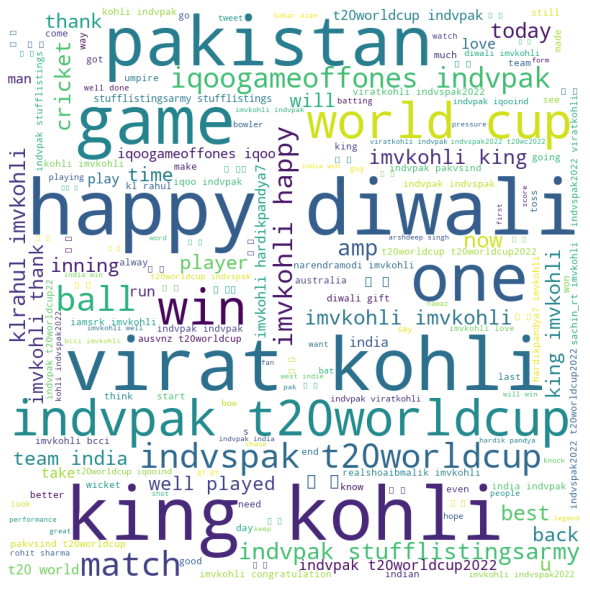

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
df.shape

(272270, 15)

In [ ]:
df_small=df[1:27227]

In [ ]:
emotion=df_small['text'].apply(lambda x: te.get_emotion(x))

In [ ]:
emotion

1        {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
2        {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
3        {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
4        {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
5        {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
                               ...                        
27222    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ...
27223    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
27224    {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
27225    {'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...
27226    {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
Name: text, Length: 27226, dtype: object

In [ ]:
emotions_all=df['text'].apply(lambda x: te.get_emotion(x))

In [ ]:
emotion_cat=[]
for em in emotion:
  if all(value == 0 for value in em.values()):
    emotion_cat.append("Not classified")
  else:
    max_value = max(em, key=em.get)
    emotion_cat.append(max_value)

In [ ]:
# Writing a function to output count plot 
def countplot_sns(attribute,title):
  _=plt.figure(figsize=(12,7))
  ax = sns.countplot(x=attribute,
                     order=attribute.value_counts(ascending=False).index);
  abs_values = attribute.value_counts(ascending=False)
  rel_values = attribute.value_counts(ascending=False, normalize=True).values * 100
  lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

  _=ax.bar_label(container=ax.containers[0], labels=lbls)
  _=plt.title(title)

In [ ]:
df_cat=pd.DataFrame(emotion_cat)

In [ ]:
df_small["emotion"]=emotion_cat

<ipython-input-33-c7886fda9323>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small["emotion"]=emotion_cat


In [ ]:
df_small["emotion"].to_csv("labelled.csv")

In [ ]:
countplot_sns(df_cat[0],"COUNT")

## Sentiment Intensity Analyzer using NLTK

In [ ]:
df_labelled=pd.read_csv("/content/drive/Shareddrives/UnipiSharedDrive/labelled.csv")

In [ ]:
df_labelled=df_labelled.drop(["Unnamed: 0"],axis=1)

In [ ]:
df_small['emotion']=df_labelled["emotion"]

In [ ]:
train_df=df_small

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()
sentiment=train_df['text'].apply(lambda x: sia.polarity_scores(x)["compound"])

In [ ]:
train_df["sentiment_score"]=sentiment

In [ ]:
train_df['sentiment'] = np.where(train_df['sentiment_score'] > 0, 'Positive', 'Negative')

In [ ]:
train_df['sentiment'].value_counts()

Negative    15142
Positive    12084
Name: sentiment, dtype: int64

In [ ]:
countplot_sns(train_df['sentiment'],"Sentiment Polarity")

NameError: ignored

In [ ]:
type(sentiment)

pandas.core.series.Series

In [ ]:
train_df

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers,emotion,sentiment_score
1,1584684371512291330,@TheBarmyArmy luv it \n\n❤️❤️❤️\n\n#INDvPAK \n...,Krishna59638949,"['INDvPAK', 'indvspakmatch', 'INDvsPAK2022']",2022-10-24 23:12:50+00:00,24,0,0,0,0,en,NaN,1.584539e+18,https://twitter.com/TheBarmyArmy,@TheBarmyArmy luv it \n\n❤️❤️❤️\n\n#INDvPAK \n...,Not classified,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,1584684147339296768,#INDvsPAK2022,kingbabar__,['INDvsPAK2022'],2022-10-24 23:11:57+00:00,56,0,0,0,0,qht,NaN,NaN,NaN,#INDvsPAK2022,Not classified,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,1584684139839905792,No ball thi #INDvsPAK2022,kingbabar__,['INDvsPAK2022'],2022-10-24 23:11:55+00:00,56,0,0,0,0,en,NaN,NaN,NaN,No ball thi #INDvsPAK2022,Not classified,"{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'comp..."
4,1584681884210319360,@mufaddal_vohra @ImRo45 \n@BCCI \n\nWhen will\...,Krishna59638949,"['INDvPAK', 'INDvsPAK2022', 'T20Cricket']",2022-10-24 23:02:57+00:00,24,1,0,0,0,en,NaN,1.584460e+18,https://twitter.com/mufaddal_vohra,@mufaddal_vohra @ImRo45 \n@BCCI \n\nWhen will\...,Fear,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,1584680546005037056,What’s your zodiac sign ?And what’s your Fav S...,Chinab71816809,"['MAMA2022', 'TweetOfTheDay', 'T20WorldCup', '...",2022-10-24 22:57:38+00:00,9,0,0,0,0,en,NaN,NaN,NaN,What’s your zodiac sign ?And what’s your Fav S...,Surprise,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27222,1584151780190871553,God was with us today 🤣 #INDvsPAK2022,MirchiLaddoo,['INDvsPAK2022'],2022-10-23 11:56:31+00:00,3844,1,0,0,0,en,NaN,NaN,NaN,God was with us today 🤣 #INDvsPAK2022,Fear,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp..."
27223,1584151779910254593,Never ever doubt about a quality player like V...,Thisis_Anku,['INDvsPAK2022'],2022-10-23 11:56:31+00:00,144,0,0,0,0,en,NaN,NaN,NaN,Never ever doubt about a quality player like V...,Not classified,"{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'comp..."
27224,1584151779872473089,Don't ever insult him comparing with anyone. #...,Bihari_Boy_,"['Kohli', 'INDvsPAK2022']",2022-10-23 11:56:31+00:00,173,0,0,1,0,en,NaN,NaN,NaN,Don't ever insult him comparing with anyone. #...,Happy,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp..."
27225,1584151779863764992,What a match 😭😭.. Last over ne to dil jeet lia...,reeti_r,['INDvsPAK2022'],2022-10-23 11:56:31+00:00,480,0,0,0,0,en,NaN,NaN,NaN,What a match 😭😭.. Last over ne to dil jeet lia...,Not classified,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp..."


In [ ]:
# import Profile_Report
from pandas_profiling import ProfileReport
# generate profile report
train_profile = ProfileReport(train_df, title='Pandas Profiling Report')

In [ ]:
train_profile.to_notebook_iframe()

NameError: ignored

In [ ]:
# define a function that removes urls from the text
def remove_url(text):
    text=re.sub(r'((?:https?|ftp|file)://[-\w\d+=&@#/%?~|!:;\.,]*)', '', text)
    return text

# remove URLs from the text and show the modified text in a new column
train_df['text_cleaned'] = train_df['text'].apply(remove_url)

In [ ]:
# define a function that removes html tags from the text
def remove_html(text):
    text=re.sub(r'<.*?>', '', text)
    return text

# remove html tags from the text
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_html)

In [ ]:
# define a function that removes character references from the text
def remove_references(text):
    text=re.sub(r'&[a-zA-Z]+;?', '', text)
    return text

# remove character references from the text
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_references)

In [ ]:
# check which characters are printable (ASCII)
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [ ]:
# define a function that removes non-printable characters from the text
def remove_non_printable(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# remove non-printable characters from the text
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_non_printable)

In [ ]:
# define a function that removes numeric values from the text
def remove_alphanum(text):
    text = re.sub(r'\w*\d+\w*', '', text)
    return text

# remove numeric vlaues from the text
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_alphanum)

In [ ]:
# create a new feature for the number of sentences in each tweet
train_df['sent_count'] = train_df['text_cleaned'].apply(nltk.tokenize.sent_tokenize).apply(len)

In [ ]:
# create a new feature for the number of words in each tweet
train_df['word_count'] = train_df['text_cleaned'].apply(nltk.tokenize.word_tokenize).apply(len)

In [ ]:
# create a new feature for the number of characters in each tweet
train_df['char_count'] = train_df['text_cleaned'].apply(lambda x: len(x)-x.count(' '))


In [ ]:
# define a function that returns the number of hashtags in a string
def hash_count(string):
    words = string.split()
    hashtags = [w for w in words if w.startswith('#')]
    return len(hashtags)

# create a new feature for the number of hashtags in each tweet
train_df['hash_count'] = train_df['text_cleaned'].apply(hash_count)

In [ ]:
# define a function that returns the number of mentions in a string
def ment_count(string):
    words = string.split()
    mentions = [w for w in words if w.startswith('@')]
    return len(mentions)

# create a new feature for the number of mentions in each tweet
train_df['ment_count'] = train_df['text_cleaned'].apply(ment_count)

In [ ]:
# define a function that returns the number of word in all CAPS in a string
def all_caps_count(string):
    words = string.split()
    pattern = re.compile(r'\b[A-z]+[A-Z]+\b')
    capswords = [w for w in words if w in re.findall(pattern, string)]
    return len(capswords)

# create a new feature for the number of word in all CAPS in each tweet
train_df['all_caps_count'] = train_df['text_cleaned'].apply(all_caps_count)

In [ ]:
# define a function that returns the average length of words in a string
def word_avg(string):
    words = string.split()
    total_len = sum([len(words[i]) for i in range(len(words))])
    avg_len = round(total_len/len(words), 2)
    return avg_len

# create a new feature for the average length of words in each tweet
train_df['word_avg'] = train_df['text_cleaned'].apply(word_avg)

In [ ]:
# define a function using nltk that returns the number of proper nouns in a string
def propn_count(text):
    tokens = nltk.tokenize.word_tokenize(text)
    tagged =[token for token in nltk.pos_tag(tokens)]
    propn = [token for (token, tag) in tagged if tag=='NNP' or tag=='NNPS']
    return len(propn)

# create a new feature for the number of proper noun in each tweet
train_df['propn_count'] = train_df['text_cleaned'].apply(propn_count)

In [ ]:
# check the results
train_df[['id', 'text', 'text_cleaned', 'propn_count']].head()

,id,text,text_cleaned,propn_count
1,1584684371512291330,@TheBarmyArmy luv it \n\n❤️❤️❤️\n\n#INDvPAK \n...,@TheBarmyArmy luv it \n\n\n\n#INDvPAK \n#indvs...,2
2,1584684147339296768,#INDvsPAK2022,#,0
3,1584684139839905792,No ball thi #INDvsPAK2022,No ball thi #,0
4,1584681884210319360,@mufaddal_vohra @ImRo45 \n@BCCI \n\nWhen will\...,@mufaddal_vohra @ \n@BCCI \n\nWhen will\n\n@kl...,4
5,1584680546005037056,What’s your zodiac sign ?And what’s your Fav S...,Whats your zodiac sign ?And whats your Fav Sig...,8


In [ ]:
# test how nltk worked with the first text
string = "Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all"
print([(token, tag) for (token, tag) in nltk.pos_tag(nltk.word_tokenize(string)) if tag == 'NNP'])

[('Reason', 'NNP'), ('May', 'NNP'), ('ALLAH', 'NNP'), ('Forgive', 'NNP')]


In [ ]:
# test how nltk works with the first text after lowercasing it
string = "Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all"
print([(token, tag) for (token, tag) in nltk.pos_tag(nltk.word_tokenize(string.lower())) if tag == 'NNP'])

[]


In [ ]:
# load the model
nlp = spacy.load('en_core_web_sm')

# check the same string with spaCy
string = "Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all"
print([(token.text, token.pos_) for token in nlp(string) if token.pos_=='PROPN'])

[('ALLAH', 'PROPN')]


In [ ]:
# define a function that returns number of proper nouns with spaCy
def propn_count(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('PROPN')

# create a new feature for the number of proper noun in each tweet
train_df['propn_count'] = train_df['text_cleaned'].apply(propn_count)

In [ ]:
# define a function that returns number of non-proper nouns
def noun_count(text, model=nlp):
    doc = model(text)
    pos= [token.pos_ for token in doc]
    return  pos.count('NOUN')


# create a new feature for the number of non-proper noun in each tweet
train_df['noun_count'] = train_df['text_cleaned'].apply(noun_count)

KeyboardInterrupt: ignored

In [ ]:
train_df

In [ ]:
import string

# define a function that returns the percentage of punctuation
def punc_count(text):
    total_count = len(text)-text.count(" ")
    punc_count = sum([1 for c in text if c in string.punctuation])
    if punc_count!=0 and total_count!=0:
        return round(punc_count/total_count*100, 2)
    else:
        return 0
    
# create a new feature for the percentage of punctuation in each tweet
train_df['punc_count'] = train_df['text_cleaned'].apply(punc_count)

In [ ]:
# check the results
train_df.tail()

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,...,text_cleaned,sent_count,word_count,char_count,hash_count,ment_count,all_caps_count,word_avg,propn_count,punc_count
27222,1584151780190871553,God was with us today 🤣 #INDvsPAK2022,MirchiLaddoo,['INDvsPAK2022'],2022-10-23 11:56:31+00:00,3844,1,0,0,0,...,God was with us today #,1,6,18,1,0,0,3.00,1,5.56
27223,1584151779910254593,Never ever doubt about a quality player like V...,Thisis_Anku,['INDvsPAK2022'],2022-10-23 11:56:31+00:00,144,0,0,0,0,...,Never ever doubt about a quality player like V...,1,11,44,1,0,1,3.91,1,2.27
27224,1584151779872473089,Don't ever insult him comparing with anyone. #...,Bihari_Boy_,"['Kohli', 'INDvsPAK2022']",2022-10-23 11:56:31+00:00,173,0,0,1,0,...,Don't ever insult him comparing with anyone. #...,2,12,45,2,0,0,5.00,1,8.89
27225,1584151779863764992,What a match 😭😭.. Last over ne to dil jeet lia...,reeti_r,['INDvsPAK2022'],2022-10-23 11:56:31+00:00,480,0,0,0,0,...,What a match .. Last over ne to dil jeet lia.....,2,17,60,1,0,0,3.80,0,15.00
27226,1584151779562119172,Welldone Team India 🇮🇳 \n\n#INDvsPAK2022,RinkuMedia,['INDvsPAK2022'],2022-10-23 11:56:31+00:00,674,0,0,1,0,...,Welldone Team India \n\n#,1,4,20,1,0,0,4.50,3,5.00


In [ ]:
# lemmatixe the text
train_df['text_cleaned'] = train_df['text_cleaned'].apply(lambda x: ' '.join([t.lemma_ for t in nlp(x)]))

In [ ]:
# lowercase the text
train_df['text_cleaned'] = [t.lower() for t in train_df['text_cleaned']]

In [ ]:
# define a function that removes repeated characters in elongated words
def remove_repeated(text):
    elongated= re.compile(r'(\S*?)([a-z])\2{2,}')
    text = elongated.sub(r'\1\2', text)
    return text

# remove repeated characters in elongated words
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_repeated)

In [ ]:
# define a function that removes mentions
def remove_mention(text):
    text = re.sub(r'@\w+', '', text)
    return text

# remove mentions
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_mention)

In [ ]:
# define a function that removes stpwords
def remove_stopwords(text):
    stopwords = nlp.Defaults.stop_words
    text_nostop = ' '.join([token for token in text.split() if token not in stopwords])
    return text_nostop

# remove repeated characters in elongated words
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_repeated)

In [ ]:
# define a function to remove punctuation
def remove_punct(text):
    punct = string.punctuation
    text_nospunct = ' '.join([token for token in text.split() if token not in punct])
    return text_nospunct

# remove punctuation
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_punct)

In [ ]:
# check the results
train_df[['id', 'text', 'text_cleaned']].head()

,id,text,text_cleaned
1,1584684371512291330,@TheBarmyArmy luv it \n\n❤️❤️❤️\n\n#INDvPAK \n...,luv it \n\n\n\n # indvpak \n # indvspakmatch ...
2,1584684147339296768,#INDvsPAK2022,#
3,1584684139839905792,No ball thi #INDvsPAK2022,no ball thi #
4,1584681884210319360,@mufaddal_vohra @ImRo45 \n@BCCI \n\nWhen will\...,@ \n \n\n when will \n\n \n\n ever learn ? ...
5,1584680546005037056,What’s your zodiac sign ?And what’s your Fav S...,what s your zodiac sign ? and what s your fav ...


In [ ]:
train_df["sentiment"].replace({"Negative": 0, "Positive":1},inplace=True)

In [ ]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate the vectorizer
tfidf = TfidfVectorizer(max_features=6000)

# fit and transform
x_tfidf = tfidf.fit_transform(train_df['text_cleaned']).toarray()

In [ ]:
# import the library
from sklearn.model_selection import train_test_split
random_state=786
# select the input/output
X = x_tfidf
Y = train_df['sentiment']

# split the data 
# the name, x_val, y_val, are usedinstead of x_test, y_test to avoid confusion with our actual test data
# which we will be using to make the predictions with the selected model at the end of this notebook.
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=random_state)

In [ ]:
# create a dictionary containing the names and code of algorithms
random_state = 786
clfs = {'MNB': MultinomialNB(),
        'LR': LogisticRegression(max_iter=10000, random_state=random_state),
       'RFC': RandomForestClassifier(random_state=random_state),
       'ETC': ExtraTreesClassifier(random_state=random_state),
       'BC': BaggingClassifier(random_state=random_state),
       'XGBC': XGBClassifier(n_estimators=50, random_state=random_state)}

In [ ]:
# create afunction that builds and  runs multiple classification models
def classify(clf, x_train,x_val, y_train, y_val):
    y_pred = clf.fit(x_train, y_train).predict(x_val)
    train_accuracy = clf.score(x_train,y_train)
    val_accuracy = accuracy_score(y_val, y_pred)
    f1score = f1_score(y_val, y_pred)
    return train_accuracy, val_accuracy, f1score

In [ ]:
# create lists to store scores to build a dataframe later on
val_accuracy_series = []
f1score_series = []

# run the models with classify() function we created above(this takes some times)
for name, clf in clfs.items():
    i_train_accuracy, i_val_accuracy, i_f1score = classify(clf, x_train, x_val, y_train, y_val)
    
    # append the scores to the lists
    val_accuracy_series.append(i_val_accuracy)
    f1score_series.append(i_f1score)
    
    # print out the scores
    print('For [{}]-\nTrain acuuracy : {} | Val accuracy : {} | F1 Score : {}\n'.format(name,
                                                                                  round(i_train_accuracy,2),
                                                                                  round(i_val_accuracy,2),
                                                                                  round(i_f1score,2)))
    

For [MNB]-
Train acuuracy : 0.87 | Val accuracy : 0.84 | F1 Score : 0.82

For [LR]-
Train acuuracy : 0.91 | Val accuracy : 0.89 | F1 Score : 0.87

For [RFC]-
Train acuuracy : 1.0 | Val accuracy : 0.88 | F1 Score : 0.87

For [ETC]-
Train acuuracy : 1.0 | Val accuracy : 0.89 | F1 Score : 0.88

For [BC]-
Train acuuracy : 0.99 | Val accuracy : 0.89 | F1 Score : 0.87

For [XGBC]-
Train acuuracy : 0.83 | Val accuracy : 0.82 | F1 Score : 0.77



In [ ]:
# create a dataframe with the scores
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),
                         'Accuracy': val_accuracy_series,
                         'F1score': f1score_series}).round(2).sort_values('F1score', ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,F1score
3,ETC,0.89,0.88
1,LR,0.89,0.87
2,RFC,0.88,0.87
4,BC,0.89,0.87
0,MNB,0.84,0.82
5,XGBC,0.82,0.77


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.89
1,LR,Accuracy,0.89
2,RFC,Accuracy,0.88
3,BC,Accuracy,0.89
4,MNB,Accuracy,0.84
5,XGBC,Accuracy,0.82
6,ETC,F1score,0.88
7,LR,F1score,0.87
8,RFC,F1score,0.87
9,BC,F1score,0.87


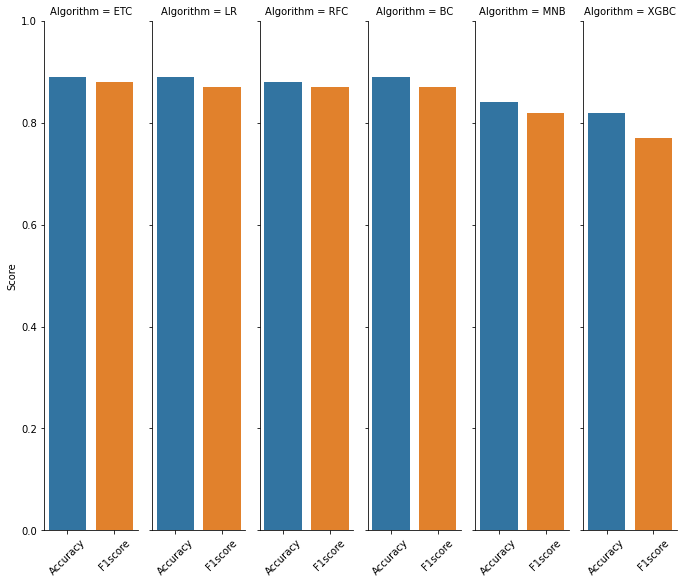

In [ ]:
g = sns.catplot(data=performance_df1, col='Algorithm', y='value', x='variable', kind='bar', height=8, aspect=0.2)
g.set_axis_labels("", "Score")
g.set(ylim=(0, 1))
g.set_xticklabels(rotation=45)
plt.show()

In [ ]:
# Applying Voting Classifier on top 3 models
mnb = MultinomialNB()
RFC =RandomForestClassifier(random_state=random_state)
lr = LogisticRegression(max_iter=10000, random_state=random_state)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('LM', lr), ('RFC', RFC), ('NB', mnb)], voting='soft')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('LM',
                              LogisticRegression(max_iter=10000,
                                                 random_state=786)),
                             ('RFC', RandomForestClassifier(random_state=786)),
                             ('NB', MultinomialNB())],
                 voting='soft')

In [ ]:
y_pred = voting.predict(x_val)
print('Accuracy', accuracy_score(y_val, y_pred))
print('F1score', f1_score(y_val, y_pred))

Accuracy 0.8868894601542416
F1score 0.8752025931928686


In [ ]:
# Applying Stacking classifier on top 3 model
estimators=[('LM', lr), ('RFC', RFC), ('NB', mnb)]
final_estimator = RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(estimators = estimators, final_estimator=final_estimator)
stacking.fit(x_train,y_train)

StackingClassifier(estimators=[('LM',
                                LogisticRegression(max_iter=10000,
                                                   random_state=786)),
                               ('RFC',
                                RandomForestClassifier(random_state=786)),
                               ('NB', MultinomialNB())],
                   final_estimator=RandomForestClassifier())

In [ ]:
y_pred = stacking.predict(x_val)
print('Accuracy', accuracy_score(y_val, y_pred))
print('F1score', f1_score(y_val, y_pred))

Accuracy 0.8920308483290489
F1score 0.8822587104525432


In [ ]:
# fit the cleaned text to vectorizer
train_tfidf = tfidf.fit_transform(train_df['text_cleaned'])
test_tfidf = tfidf.transform(test_data['text'])

# store the labels
y_train = train_df['sentiment']

# check the shape
print(train_tfidf.shape, test_tfidf.shape)

(27226, 6000) (523, 6000)


In [ ]:
print(train_tfidf)

  (0, 2503)	0.35664421702569715
  (0, 2498)	0.33629161452922157
  (0, 2626)	0.30227114468082533
  (0, 3344)	0.8175237045815861
  (2, 5376)	0.7555619636605154
  (2, 486)	0.4651400150494215
  (2, 3801)	0.46127094583258754
  (3, 3193)	0.6120948860491437
  (3, 1675)	0.399256945343654
  (3, 5845)	0.3859956963342718
  (3, 5814)	0.4372276230653313
  (3, 2498)	0.3546449916570111
  (4, 5707)	0.058939267121168586
  (4, 5946)	0.2507135998206403
  (4, 5538)	0.1758352583695191
  (4, 92)	0.2640508117603879
  (4, 5225)	0.22383113397449605
  (4, 4435)	0.245953342834668
  (4, 5499)	0.1854032866924691
  (4, 5533)	0.25653968351418055
  (4, 1768)	0.23536700215515544
  (4, 220)	0.0802514138802234
  (4, 4920)	0.6835676217268442
  (4, 5976)	0.26012435912733306
  (4, 5801)	0.1596254435835277
  :	:
  (27222, 1675)	0.274491686140574
  (27223, 2557)	0.5581008367106444
  (27223, 1119)	0.4126219560636262
  (27223, 5866)	0.27827571122768974
  (27223, 3054)	0.15330277249543237
  (27223, 260)	0.4170755427816203
  (27

In [ ]:
test_data["sentiment"]

0      1
1      0
2      1
3      0
4      0
      ..
518    0
519    0
520    0
521    1
522    1
Name: sentiment, Length: 523, dtype: int64

In [ ]:
final_model = LogisticRegression(max_iter=10000, random_state=random_state)

# fit the model and check the processing time
import time
start = time.time()
final_model.fit(train_tfidf, y_train)
end = time.time()
fit_time = end - start

# make predictions and check the processing time
start = time.time()
final_pred = final_model.predict(test_tfidf)
end = time.time()
pred_time = end - start

# check accuracy
print('Accuracy', accuracy_score(test_data["sentiment"], final_pred))
print('F1score', f1_score(test_data["sentiment"], final_pred))

print('Fit time: {} secs | Predict time: {} secs'.format(round(fit_time, 2), round(pred_time, 2)))

Accuracy 0.8948374760994264
F1score 0.8801742919389979
Fit time: 0.81 secs | Predict time: 0.0 secs


In [ ]:
train_df.loc[train_df["emotion"]!="Not classified"][["text","sentiment","emotion"]]

,text,sentiment,emotion
4,@mufaddal_vohra @ImRo45 \n@BCCI \n\nWhen will\...,0,Fear
5,What’s your zodiac sign ?And what’s your Fav S...,1,Surprise
6,@adidoescricket @TheRealPCB \n@ICC\n\nHe will ...,1,Happy
7,@RJ_Balaji kirukku koodhian.. Spoiled the imp...,1,Surprise
8,Bhai log hum hindu hein isiliye toh Pakistan a...,0,Surprise
...,...,...,...
27219,#INDvsPAK2022 #Worlds2022 #WorldCup2022 All h...,0,Surprise
27221,Badhai ho #INDvsPAK2022 #indvspak #ViratKohli,0,Surprise
27222,God was with us today 🤣 #INDvsPAK2022,1,Fear
27224,Don't ever insult him comparing with anyone. #...,1,Happy


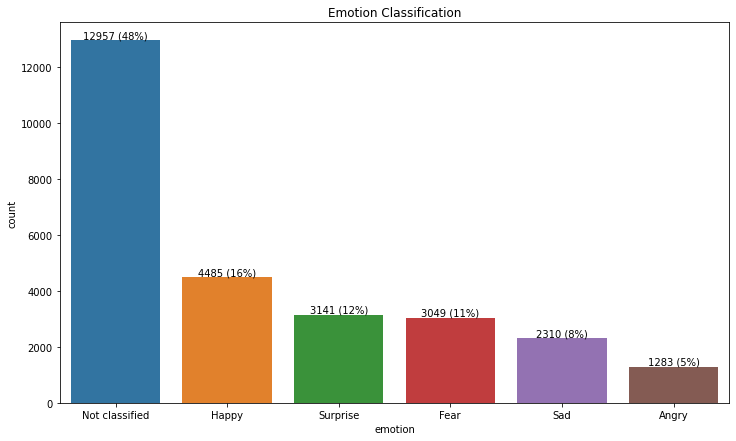

In [ ]:
countplot_sns(train_df["emotion"],"Emotion Classification")

In [ ]:
# create a dataframe for submission
submission = test_df[['id']].reset_index(drop=True)
submission['target'] = final_pred.astype('int64')

# check the dataframe
submission1=submission.iloc[:3263, :]
submission1

In [ ]:
# export the dataframe as a csv file
submission1.to_csv('submission.csv', index=False)